In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
diabetes = load_diabetes()

# Create DataFrame
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Show structure
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [2]:
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Feature and Target
X = df[['bmi']]
y = df['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")


MAE: 52.26, MSE: 4061.83, RMSE: 63.73, R²: 0.23


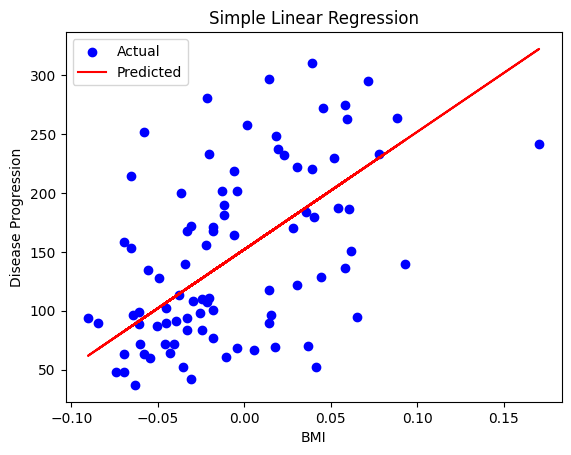

In [4]:
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', label="Predicted")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


In [5]:
# All features
X = df.drop("target", axis=1)
y = df["target"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
multi_lr = LinearRegression()
multi_lr.fit(X_train, y_train)
y_pred_multi = multi_lr.predict(X_test)

# Metrics
print("Multiple Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_multi):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_multi):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_multi)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_multi):.2f}")


Multiple Regression:
MAE: 42.79
MSE: 2900.19
RMSE: 53.85
R²: 0.45


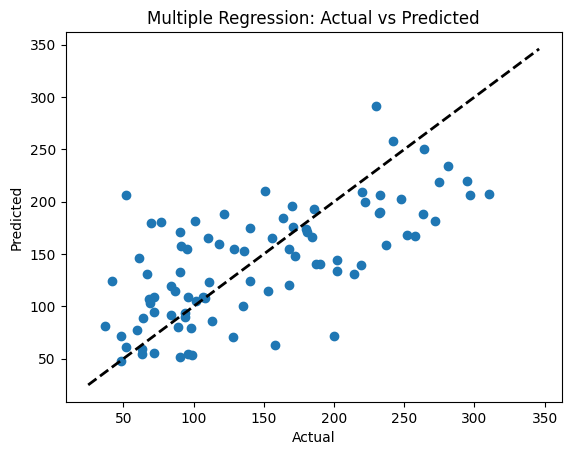

In [6]:
plt.scatter(y_test, y_pred_multi)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Multiple Regression: Actual vs Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Polynomial Features
poly = PolynomialFeatures(degree=2)
poly_model = make_pipeline(poly, LinearRegression())

poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)

print("Polynomial Regression:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_poly):.2f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_poly):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_poly)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_poly):.2f}")


Polynomial Regression:
MAE: 43.58
MSE: 3096.03
RMSE: 55.64
R²: 0.42


In [8]:
from sklearn.linear_model import Ridge, Lasso

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Evaluation
print("Ridge:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_ridge):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_ridge)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_ridge):.2f}")

print("\nLasso:")
print(f"MAE: {mean_absolute_error(y_test, y_pred_lasso):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_lasso)):.2f}")
print(f"R²: {r2_score(y_test, y_pred_lasso):.2f}")


Ridge:
MAE: 46.14
RMSE: 55.47
R²: 0.42

Lasso:
MAE: 42.85
RMSE: 52.90
R²: 0.47


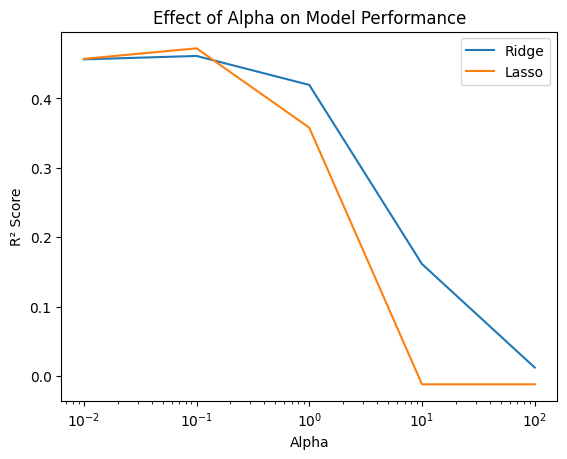

In [9]:
alphas = [0.01, 0.1, 1, 10, 100]
ridge_scores = []
lasso_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha).fit(X_train, y_train)
    lasso = Lasso(alpha=alpha).fit(X_train, y_train)
    ridge_scores.append(r2_score(y_test, ridge.predict(X_test)))
    lasso_scores.append(r2_score(y_test, lasso.predict(X_test)))

plt.plot(alphas, ridge_scores, label="Ridge")
plt.plot(alphas, lasso_scores, label="Lasso")
plt.xscale('log')
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.title("Effect of Alpha on Model Performance")
plt.legend()
plt.show()


In [10]:
results = pd.DataFrame({
    'Model': ['Simple Linear', 'Multiple Linear', 'Polynomial', 'Ridge', 'Lasso'],
    'R²': [
        r2_score(y_test, lr.predict(X_test[['bmi']])),
        r2_score(y_test, y_pred_multi),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ]
})
results


,Model,R²
0,Simple Linear,0.233350
1,Multiple Linear,0.452603
2,Polynomial,0.415640
3,Ridge,0.419153
4,Lasso,0.471855
